In [2]:
%load_ext autoreload
%autoreload 2

#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) #Limiting floats output to
pd.options.display.max_rows = 999

color = sns.color_palette()
sns.set_style('darkgrid')
from scipy.stats import norm, skew #for some statistics

import sys
sys.path.insert(0, "/Users/user/git/datasci")
from sci.metrics import rmse_score
from plots import *
import sci.features as scif
from sci.plots import *
import sci.learn as scil


Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train = df_train.set_index("id")
df_test = df_test.set_index("id")

y = df_train["target"]
X = df_train.drop('target', axis=1)

print(df_train.shape)
print(df_test.shape)

(250, 301)
(19750, 300)


## The Target

In [5]:
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

In [6]:
y.mean()

0.64

Skewness: -0.583333
Kurtosis: -1.659722


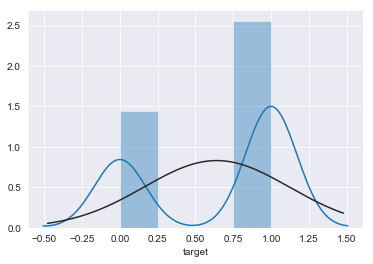

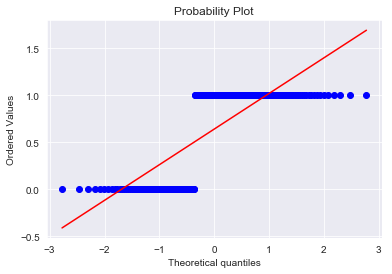

In [7]:
scip.normality(y)

Mean: -0.010974
Std: 0.076711
Skewness: 0.507698
Kurtosis: 2.027951


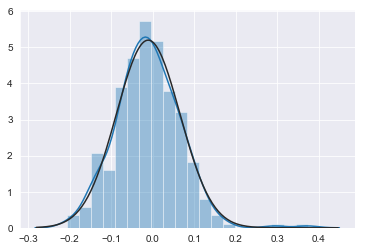

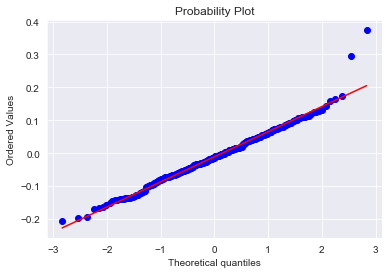

In [49]:
# the correlations are normally distributed! So we assume that the target variable is based on coeeficients which have been selected from N()
# it also seems that it's not perfectly normal.
# Atleast two coef' seem to be correlated much higher than normal
cors = X.corrwith(y)
scip.normality(cors)

Mean: -0.000621
Std: 0.063515
Skewness: -0.139897
Kurtosis: 0.078928
--
Mean: 1.001287
Std: 0.043947
Skewness: -0.158151
Kurtosis: -0.288178


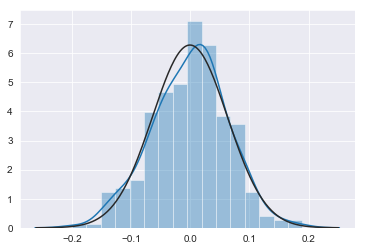

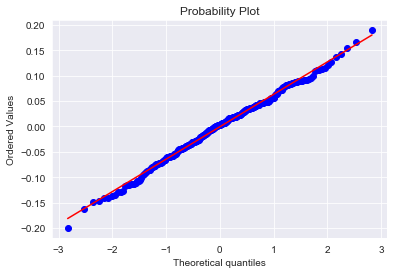

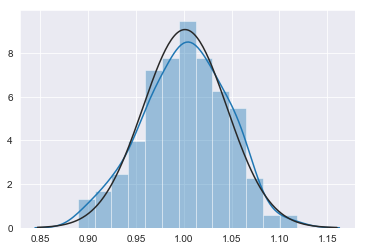

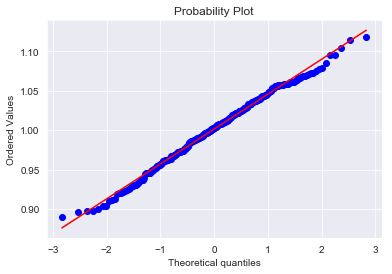

In [51]:
scip.normality(X.mean())
print("--")
scip.normality(X.std())

Mean: -0.002546
Std: 0.065407
Skewness: 0.104569
Kurtosis: -0.134329
--
Mean: 0.997189
Std: 0.044531
Skewness: 0.009942
Kurtosis: -0.000418


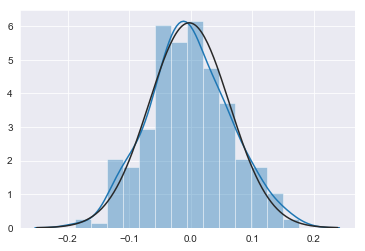

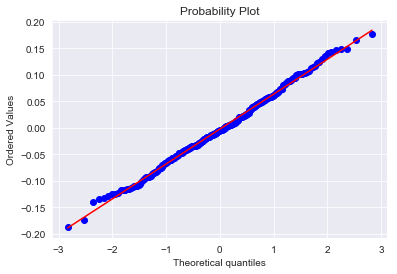

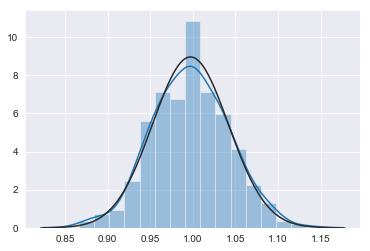

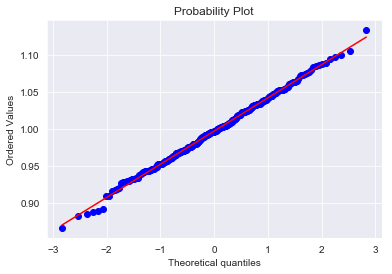

In [52]:
# we get the same dist with normal variables in N(0, 1)
Z = np.random.normal(0, 1, size=(X.shape[0], X.shape[1]))
scip.normality(Z.mean(0))
print("--")
scip.normality(Z.std(0))

## The Features

In [23]:
scif.df_summary(df_train)

,count,missing,percent,dtype,types,uniq,values,freq
0,250,0,0.0000,float64,float,242,"-2.319, -2.281, -2.176, ...","'-0.761':2, '0.62':2, '-0.119':2, '2.022':..."
206,250,0,0.0000,float64,float,238,"-3.23, -2.7439999999999998, -2.077, ...","'-0.5':3, '-0.035':2, '-0.396':2, '0.228':..."
204,250,0,0.0000,float64,float,235,"-2.717, -2.387, -2.0269999999999997, ...","'0.993':3, '-0.106':3, '0.333':2, '0.4':2, ..."
203,250,0,0.0000,float64,float,242,"-2.508, -2.281, -2.1630000000000003, ...","'-0.479':3, '-0.063':2, '-0.03':2, '-0.775..."
202,250,0,0.0000,float64,float,241,"-3.085, -2.679, -2.134, -2.101, -2.096, ...","'-0.078':2, '-0.138':2, '0.215':2, '0.328'..."
201,250,0,0.0000,float64,float,247,"-2.667, -2.545, -2.439, -2.254, -2.25, ...","'0.694':2, '-0.44':2, '-1.475':2, '0.701':..."
200,250,0,0.0000,float64,float,240,"-2.7060000000000004, -2.022, -2.017, ...","'0.049':2, '-0.227':2, '-0.767':2, '-0.07'..."
199,250,0,0.0000,float64,float,244,"-3.5210000000000004, -3.165, -2.434, ...","'-0.697':2, '0.747':2, '-0.696':2, '-0.017..."
198,250,0,0.0000,float64,float,246,"-2.699, -2.6489999999999996, -2.255, ...","'-0.673':2, '-0.069':2, '-0.65':2, '-0.538..."
197,250,0,0.0000,float64,float,239,"-2.7760000000000002, -2.7739999999999996, ...","'1.116':3, '-0.564':2, '-0.026':2, '0.062'..."


In [9]:
scif.df_summary(df_test)

,count,missing,percent,dtype,uniq,values,freq
PoolQC,3,1456,99.7944,object,2,"Ex, Gd","'Ex':2, 'Gd':1..."
MiscFeature,51,1408,96.5045,object,3,"Gar2, Othr, Shed","'Shed':46, 'Gar2':3, 'Othr':2..."
Alley,107,1352,92.6662,object,2,"Grvl, Pave","'Grvl':70, 'Pave':37..."
Fence,290,1169,80.1234,object,4,"GdPrv, GdWo, MnPrv, MnWw","'MnPrv':172, 'GdPrv':59, 'GdWo':58, 'MnWw'..."
FireplaceQu,729,730,50.0343,object,5,"Ex, Fa, Gd, Po, TA","'Gd':364, 'TA':279, 'Fa':41, 'Po':26, 'Ex':..."
LotFrontage,1232,227,15.5586,float64,115,"21.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, ...","'60.0':133, '80.0':68, '70.0':63, '50.0':6..."
GarageYrBlt,1381,78,5.3461,float64,97,"1895.0, 1896.0, 1900.0, 1910.0, 1915.0, ...","'2005.0':77, '2007.0':66, '2006.0':56, '20..."
GarageFinish,1381,78,5.3461,object,3,"Fin, RFn, Unf","'Unf':625, 'RFn':389, 'Fin':367..."
GarageQual,1381,78,5.3461,object,4,"Fa, Gd, Po, TA","'TA':1293, 'Fa':76, 'Gd':10, 'Po':2..."
GarageCond,1381,78,5.3461,object,5,"Ex, Fa, Gd, Po, TA","'TA':1328, 'Fa':39, 'Po':7, 'Gd':6, 'Ex':1..."


In [24]:
scif.df_comp(df_train, df_test, "train", "test")


has NaN mismatch train vs test:

has NaN mismatch test vs train:

dtype mismatch:

unique categorical values mismatch in train:

unique categorical values mismatch in test:


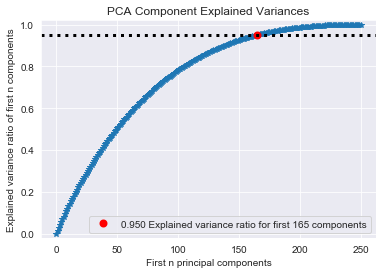

In [21]:
# from the shape of the PCA explain variance we deduce that feature selection has little use, as most features are usefull, and their impact is smoothly deminishing (syntethic dataset)
scip.pca_component_variance(df_train)

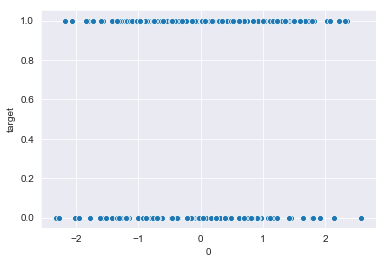

In [28]:
scip.scatter(df_train.iloc[:, 0], y)

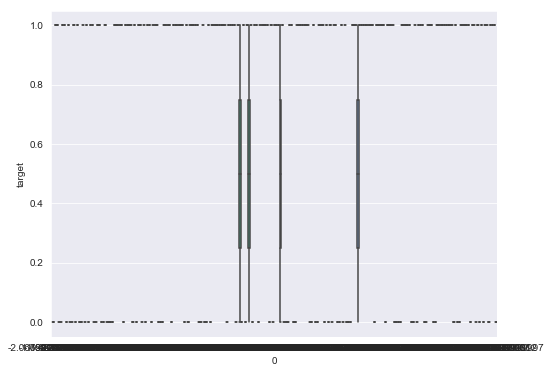

In [29]:
scip.boxplot(df_train.iloc[:, 0], y, figure=True)

missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu, dtype: int64

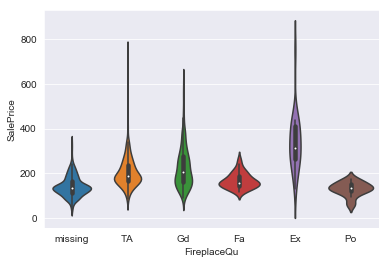

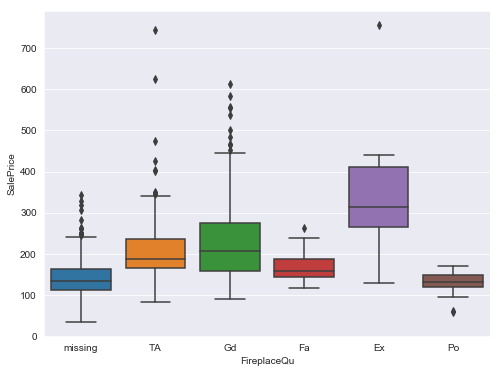

In [96]:
f = 'FireplaceQu'
v = X[f].fillna('missing')
sns.violinplot(v, y)
plot_boxplot(v, y, figure=True)
# plt.figure()
# plt.hist(X[f])
v.value_counts()


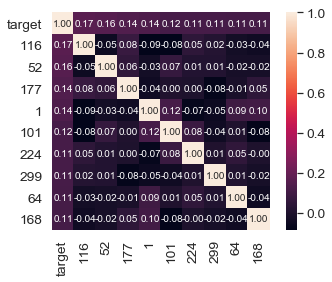

In [62]:
Z_df = pd.DataFrame(Z)
Z_df["target"] = y
scip.corr_matrix_top(Z_df, "target")
# scip.corr_matrix(Z_df)

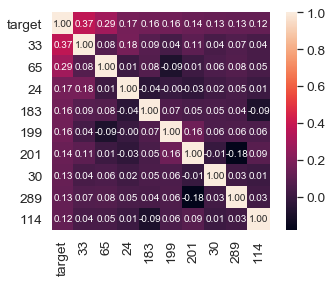

In [63]:
scip.corr_matrix_top(df_train, "target")

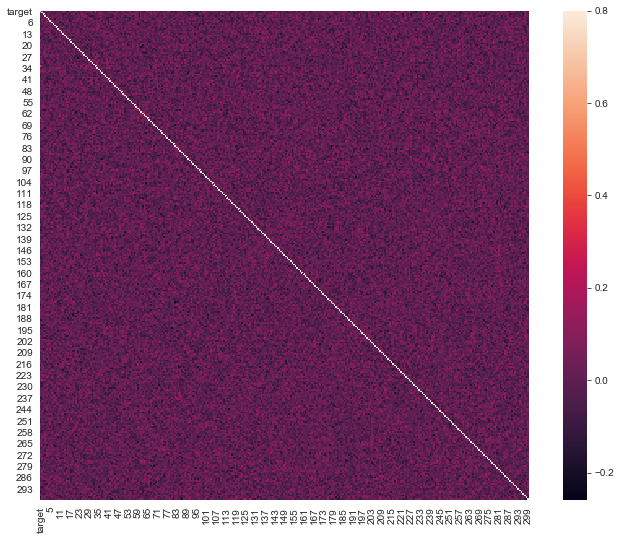

In [37]:
scip.corr_matrix(df_train)

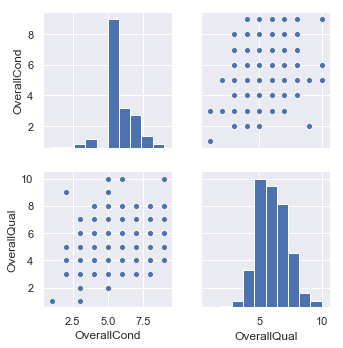

In [132]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cols = ['OverallCond', 'OverallQual']

plot_pairplot(df, cols)

Skewness: -0.140601
Kurtosis: 0.100529
Skewness: -0.158947
Kurtosis: -0.272769


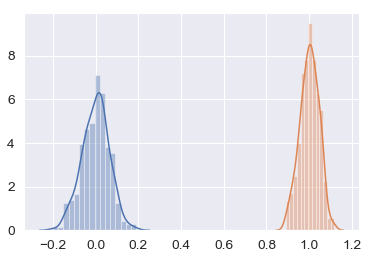

In [46]:
scip.dist(X.mean())
scip.dist(X.std())

In [60]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


## Normality

Skewness: -0.117700
Kurtosis: 0.537642


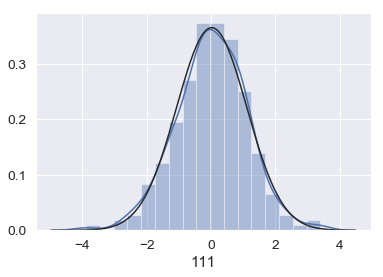

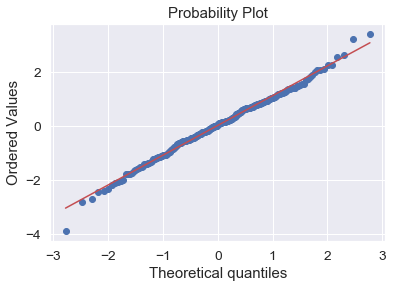

In [53]:
import scipy.stats
def plot_normality(x, figure=True):
    print("Skewness: %f" % scipy.stats.skew(x))
    print("Kurtosis: %f" % scipy.stats.kurtosis(x))
    plt.figure()
    sns.distplot(x, fit=norm);
    fig = plt.figure()
    res = stats.probplot(x, plot=plt)

# plot_normality(y)
# plot_normality(np.log(y)) # postiive skew is often reduced with log transform
plot_normality(X.iloc[:, 111])


Skewness: 0.000158
Kurtosis: 0.670501


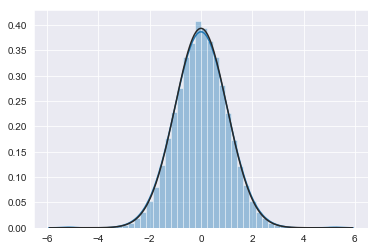

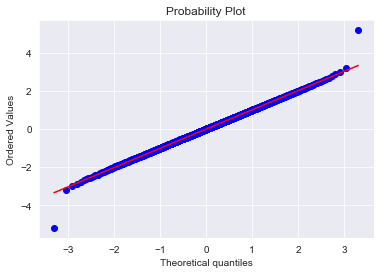

In [82]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py

from sklearn.preprocessing import PowerTransformer, QuantileTransformer

tr = PowerTransformer('yeo-johnson')
tr = PowerTransformer('box-cox')
tr = QuantileTransformer(output_distribution='normal', n_quantiles=10000)

z = tr.fit_transform(y.to_frame())
z = z[:, 0]

# tr = PowerTransformer('yeo-johnson')
# z = tr.fit_transform(y.to_frame())
# z = z[:, 0]

# z = tr.inverse_transform(z.reshape(-1, 1))
# z = z[:, 0]

# z = np.log(y)
plot_normality(z)

No handles with labels found to put in legend.


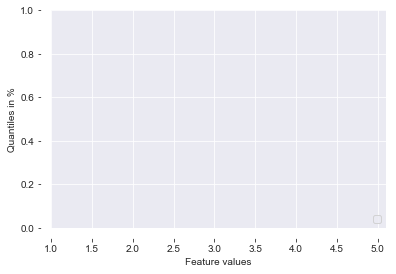

In [87]:

N_QUANTILES = 10000
FEAT_VAL = 3.0
def plot_transform_feat_val(ax, transformer, title):
    """Plot the mapping function as well as a specific feature value."""
    ref = np.linspace(0, 1, num=N_QUANTILES)

    ax.plot(transformer.quantiles_, ref)
#     ax.scatter([FEAT_VAL], [transformer.transform(FEAT_VAL)], c='r',
#                label=r'$f({0}) = {1:.2f}$'.format(
#                    FEAT_VAL,
#                    np.ravel(transformer.transform(FEAT_VAL))[0]))
    ax.set_xlabel('Feature values')
    ax.set_ylabel('Quantiles in %')
    ax.set_title(title)
    ax.legend(loc=4)
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.set_xlim([1, 5.1])
    ax.set_ylim([0, 1])
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    
plt.figure()
plot_transform_feat_val(plt.gca(), tr, "")

skew: 0.12121036730137079
lam: 0.7889241706670747
skew: 0.06252532668488879
Skewness: 0.062525
Kurtosis: 0.833391


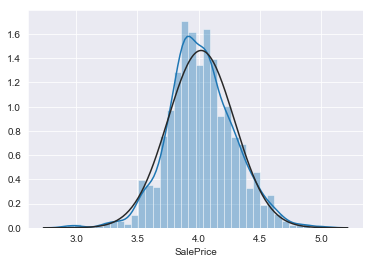

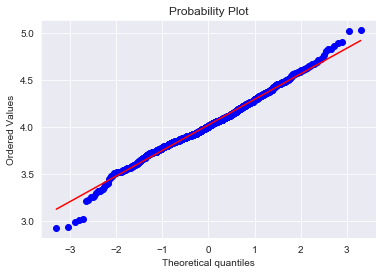

In [63]:
# plot_normality(np.power(y, 1/200000)) # postiive skew is often reduced with log transform
z = np.log(y)
# z = z - z.mean()
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

print('skew:', skew(z))
lam = 0.15
lam = boxcox_normmax(z)
print('lam:', lam)
z = boxcox1p(z, lam)
print('skew:', skew(z))

plot_normality(z.dropna())


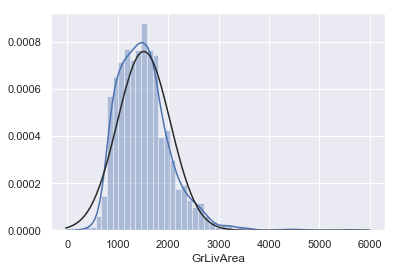

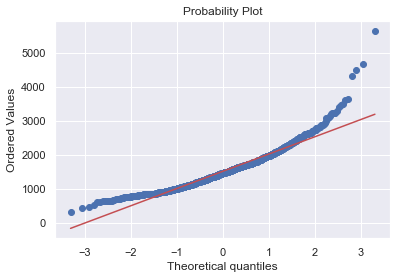

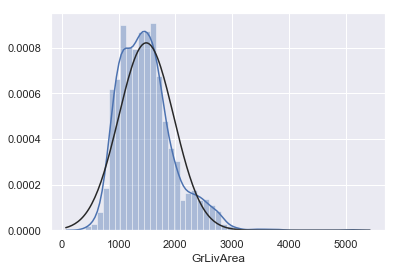

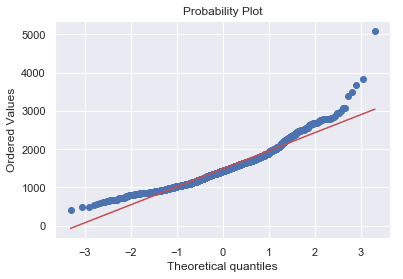

In [97]:
plot_normality(X['GrLivArea'], figure=False)
plot_normality(df_test['GrLivArea'], figure=False)
# plot_normality(np.log(X['GrLivArea'])) # postiive skew is often reduced with log transform

In [76]:
# df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
# df_train = df_train.drop(df_train[df_train.index == 1299].index)
# df_train = df_train.drop(df_train[df_train.index == 524].index)

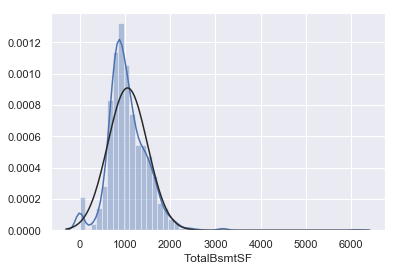

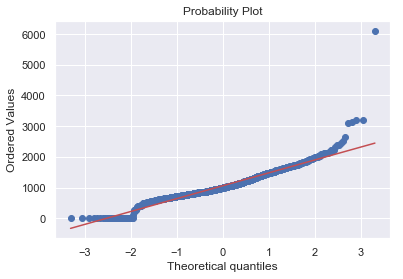

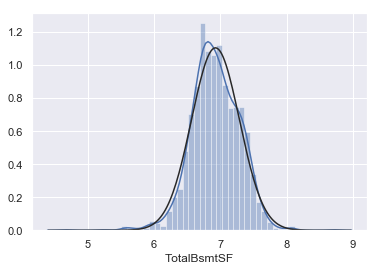

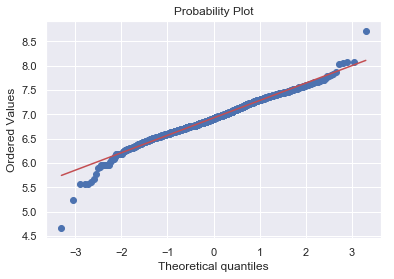

In [78]:
# in this case the zero values prevent us from making a log transform
# so we need to add a new features only for the log_transformed values
plot_normality(X['TotalBsmtSF'])
non_zero = X['TotalBsmtSF'][X['TotalBsmtSF']>0]
plot_normality(np.log(non_zero)) # postiive skew is often reduced with log transform

## homoscedasticity

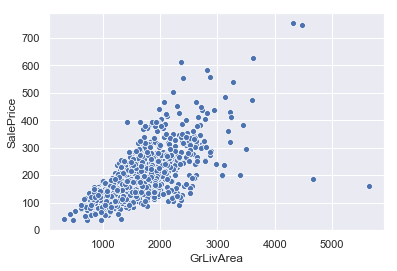

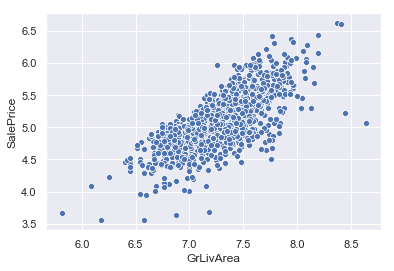

In [81]:
# log transformation help with homoscedasticity
plot_scatter(X['GrLivArea'], y)
plot_scatter(np.log(X['GrLivArea']), np.log(y))

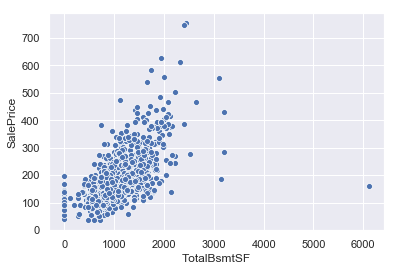

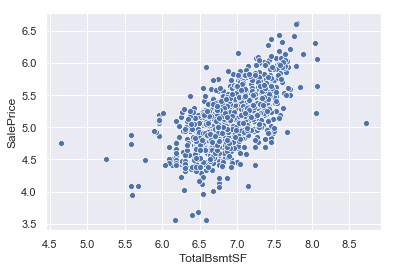

In [83]:
# log transformation help with homoscedasticity
plot_scatter(X['TotalBsmtSF'], y)
plot_scatter(np.log(X['TotalBsmtSF']), np.log(y))

## crosstab related features

In [92]:
df = df_train
display(pd.crosstab(df['SaleCondition'], df['SaleType']))

SaleType,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
SaleCondition,,,,,,,,,
Abnorml,24,1,0,2,1,0,0,3,70
AdjLand,0,0,0,0,0,0,0,0,4
Alloca,0,0,0,0,0,0,0,0,12
Family,0,1,0,0,0,0,0,0,19
Normal,19,2,2,6,4,5,0,0,1160
Partial,0,0,0,1,0,0,122,0,2


## Missings in subsets of features

In [84]:
df = df_train
cols = [x for x in df.columns if 'Garage' in x]
df = df[cols]
scif.df_summary(df, missing_only=False)

,count,missing,percent,dtype,uniq,values,freq
GarageType,1379,81,5.5479,object,6,"2Types, Attchd, Basment, BuiltIn, ...","'Attchd':870, 'Detchd':387, 'BuiltIn':88, ..."
GarageYrBlt,1379,81,5.5479,float64,97,"1900.0, 1906.0, 1908.0, 1910.0, 1914.0, ...","'2005.0':65, '2006.0':59, '2004.0':53, '20..."
GarageFinish,1379,81,5.5479,object,3,"Fin, RFn, Unf","'Unf':605, 'RFn':422, 'Fin':352..."
GarageQual,1379,81,5.5479,object,5,"Ex, Fa, Gd, Po, TA","'TA':1311, 'Fa':48, 'Gd':14, 'Ex':3, 'Po':3..."
GarageCond,1379,81,5.5479,object,5,"Ex, Fa, Gd, Po, TA","'TA':1326, 'Fa':35, 'Gd':9, 'Po':7, 'Ex':2..."
GarageCars,1460,0,0.0000,int64,5,"0, 1, 2, 3, 4","'2':824, '1':369, '3':181, '0':81, '4':5..."
GarageArea,1460,0,0.0000,int64,441,"0, 160, 164, 180, 186, 189, 192, 198, ...","'0':81, '440':49, '576':47, '240':38, '484'..."


## Base multi-variate 'mode', and unusual samples from 'mode'

In [ ]:
base_mode = show_most_common_multi_col_mode(df_train, col_contains="Bsmt")
display(base_mode[["mode"]].T)
unusual = show_unusual_rows_from_base_mode(df_train, col_contains="Bsmt")
display(unusual['_unusual'].value_counts())
unusual.query('_unusual == 1')

In [1]:
X

NameError: name 'X' is not defined